In [1]:
# Loading Libraries
import pandas as pd #Data Manipulation
import numpy as np #Data Manipulation

import matplotlib.pyplot as plt #Plotting
import seaborn as sns #Plotting
sns.set(style='white')

from sklearn import preprocessing #Preprocessing

from scipy.stats import skew, boxcox_normmax #Preprocessing
from scipy.special import boxcox1p #Preprocessing

from sklearn.model_selection import train_test_split #Train/Test Split
from sklearn.linear_model import LogisticRegression #Model

from sklearn.metrics import classification_report #Metrics
from sklearn.metrics import confusion_matrix #Metrics
from sklearn.metrics import accuracy_score #Metrics
from sklearn.metrics import roc_auc_score, roc_curve #ROC
from sklearn import model_selection #Cross Validation
from sklearn.feature_selection import RFE, RFECV #Feature Selection

In [8]:
# Reading Dataset from GitHub repository
hr = pd.read_csv('hr.csv')
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Shape of the data frame
print('Rows:', hr.shape[0], '| Columns:', hr.shape[1])

('Rows:', 1470, '| Columns:', 35)


In [10]:
##looking for any missing values

hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

# EXPLORATORY DATA ANALYSIS

In [12]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
#Mapping the attrition 1 - yes and 0 - no in the new column

hr["left"] = np.where(hr["Attrition"] == "Yes",1,0)

In [14]:

hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,left
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:

def NumericalVariables_targetPlots(df,segment_by,target_var = "Attrition"):
    """A function for plotting the distribution of numerical variables and its effect on attrition"""
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

    #boxplot for comparison
    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)
    
    #distribution plot
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)
    
    plt.show()

In [17]:
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "left"):
    
    """A function for Plotting the effect of variables(categorical data) on attrition """
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Attrition",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="Attrition",ax=ax[0])
        
    ax[0].set_title("Comparision of " + segment_by + " vs " + "Attrition")
    
    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)
        
    ax[1].set_title("Attrition rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Attrition)")
    plt.tight_layout()

    plt.show()

# ANALYZING THEVARIABLE

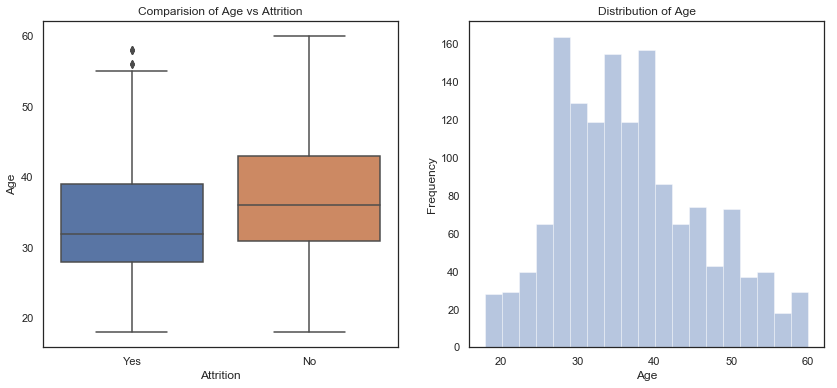

In [18]:
# we are checking the distribution of employee age and its related to attrition or not

NumericalVariables_targetPlots(hr,segment_by="Age")

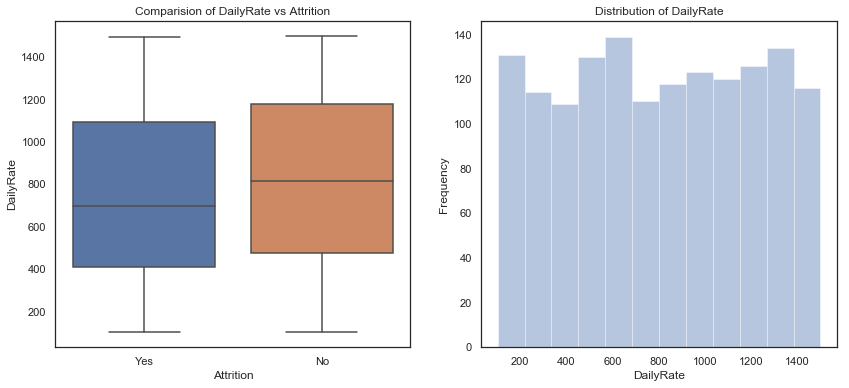

In [20]:
#Analyzing the daily wage rate vs employee left the company or not

NumericalVariables_targetPlots(hr,"DailyRate")

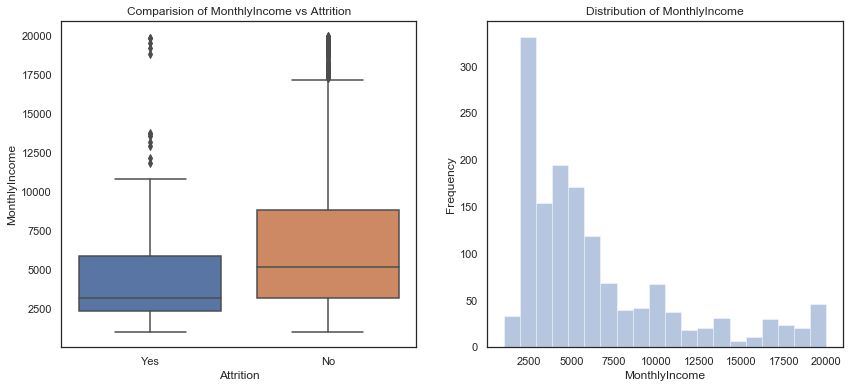

In [21]:
NumericalVariables_targetPlots(hr,"MonthlyIncome")

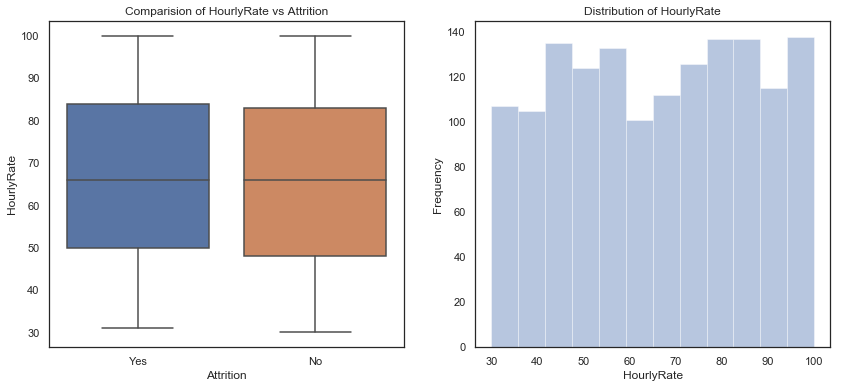

In [22]:
NumericalVariables_targetPlots(hr,"HourlyRate")

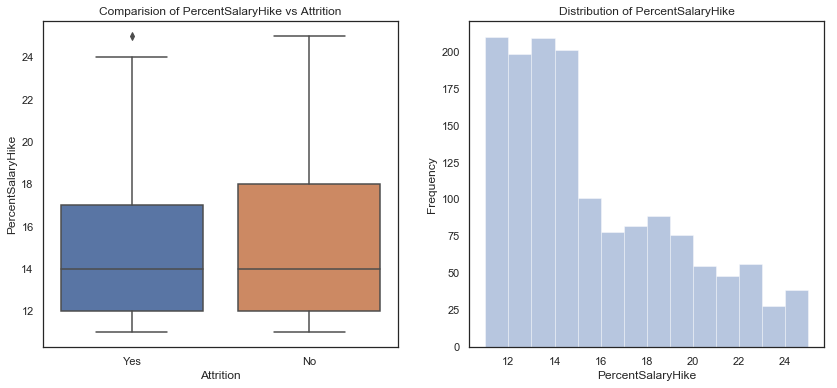

In [23]:

NumericalVariables_targetPlots(hr,"PercentSalaryHike")

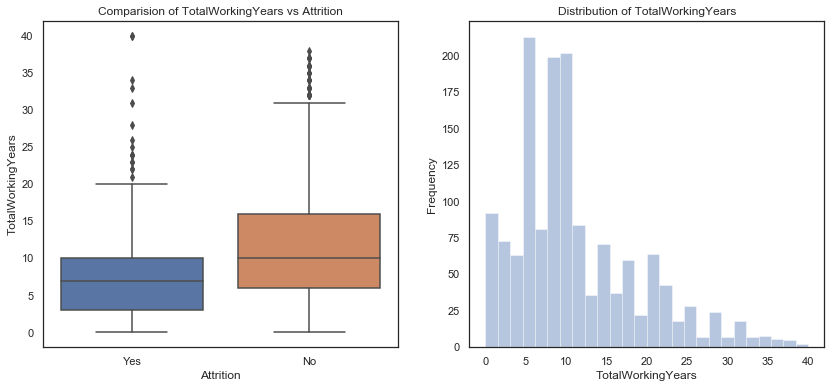

In [24]:

NumericalVariables_targetPlots(hr,"TotalWorkingYears")

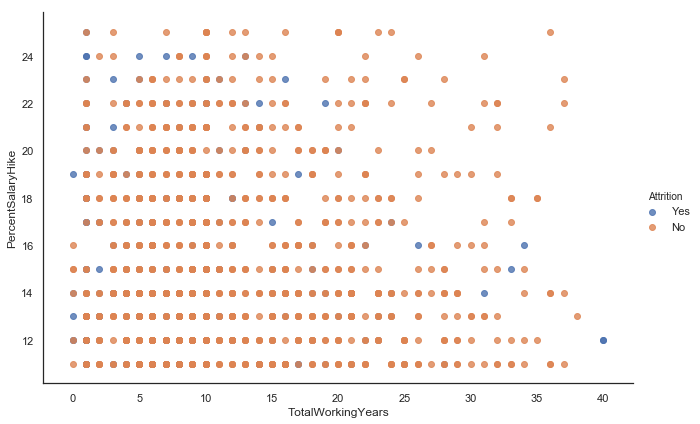

In [25]:
sns.lmplot(x = "TotalWorkingYears", y = "PercentSalaryHike", data=hr,fit_reg=False,hue="Attrition",size=6,
           aspect=1.5)

plt.show()

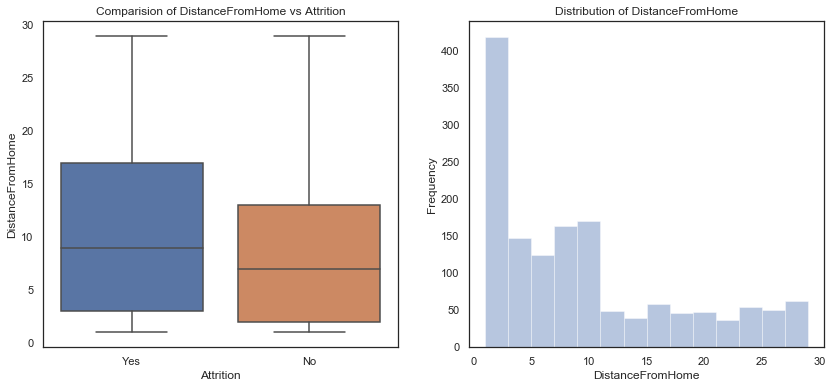

In [26]:
NumericalVariables_targetPlots(hr,"DistanceFromHome")

In [28]:

#cross tabulation between attrition and JobInvolvement
pd.crosstab(hr.JobInvolvement,hr.Attrition)

Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


In [30]:
#calculating the percentage of people having different job involvement rate
round 
(hr.JobInvolvement.value_counts()/hr.shape[0] * 100,2)

(3    59.047619
 2    25.510204
 4     9.795918
 1     5.646259
 Name: JobInvolvement, dtype: float64, 2)

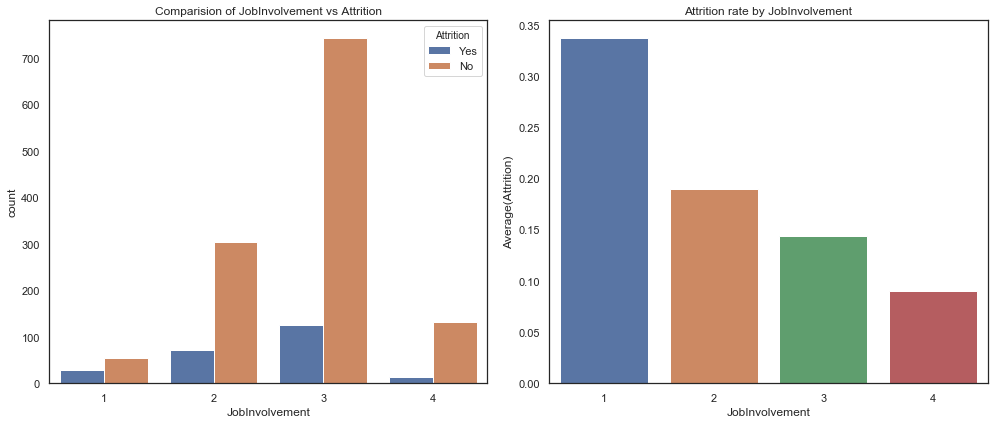

In [31]:
CategoricalVariables_targetPlots(hr,"JobInvolvement")

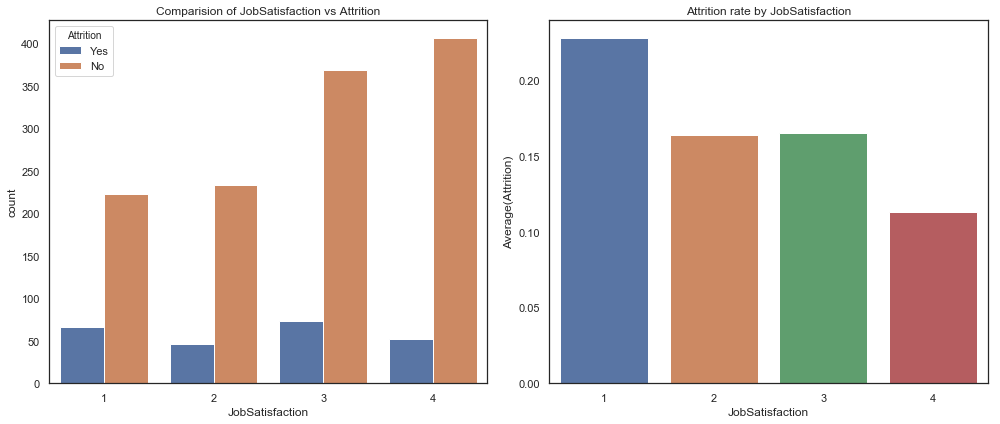

In [32]:
CategoricalVariables_targetPlots(hr,"JobSatisfaction")

In [34]:
#checking the number of categories under performance rating
hr.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [36]:
#calculate the percentage of performance rating per category in the whole dataset
round 
(hr.PerformanceRating.value_counts()/hr.shape[0] * 100,2)

(3    84.62585
 4    15.37415
 Name: PerformanceRating, dtype: float64, 2)

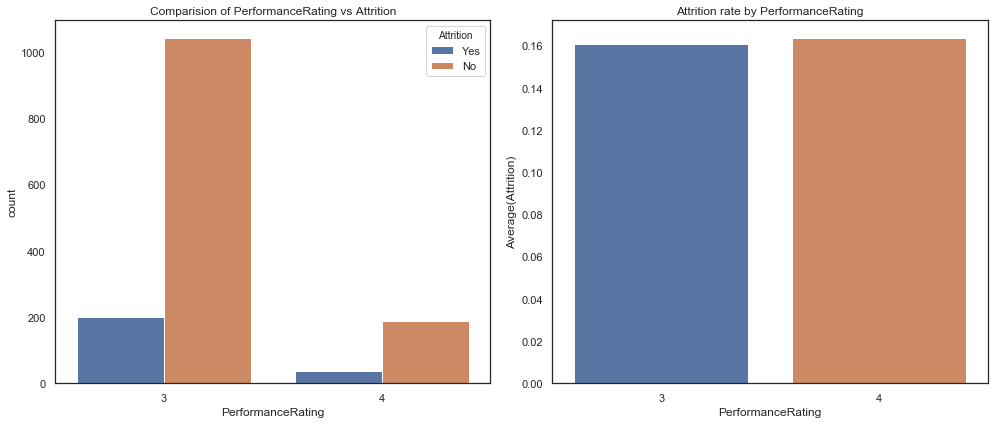

In [37]:
CategoricalVariables_targetPlots(hr,"PerformanceRating")

In [38]:
#percentage of each relationship satisfaction category across the data
round
(hr.RelationshipSatisfaction.value_counts()/hr.shape[0],2)

(3    0.312245
 4    0.293878
 2    0.206122
 1    0.187755
 Name: RelationshipSatisfaction, dtype: float64, 2)

In [39]:
#percentage of worklife balance rating across the company data
round 
(hr.WorkLifeBalance.value_counts()/hr.shape[0],2)

(3    0.607483
 2    0.234014
 4    0.104082
 1    0.054422
 Name: WorkLifeBalance, dtype: float64, 2)

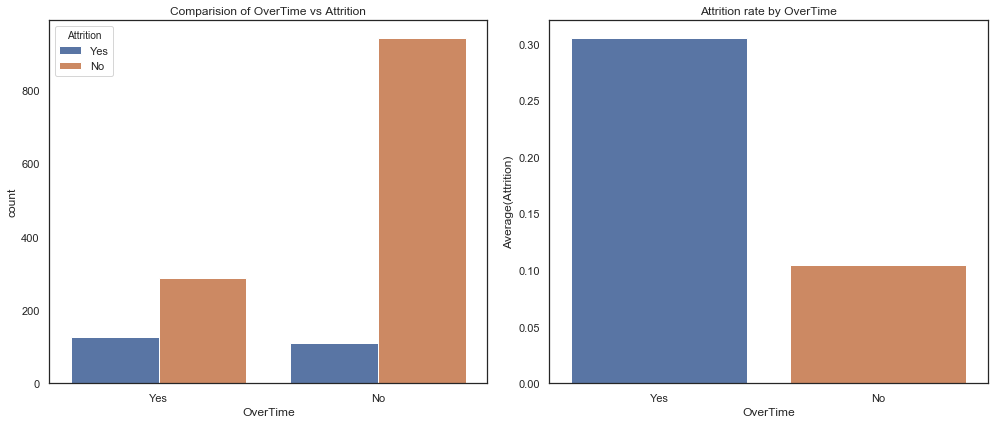

In [40]:
CategoricalVariables_targetPlots(hr,"OverTime")

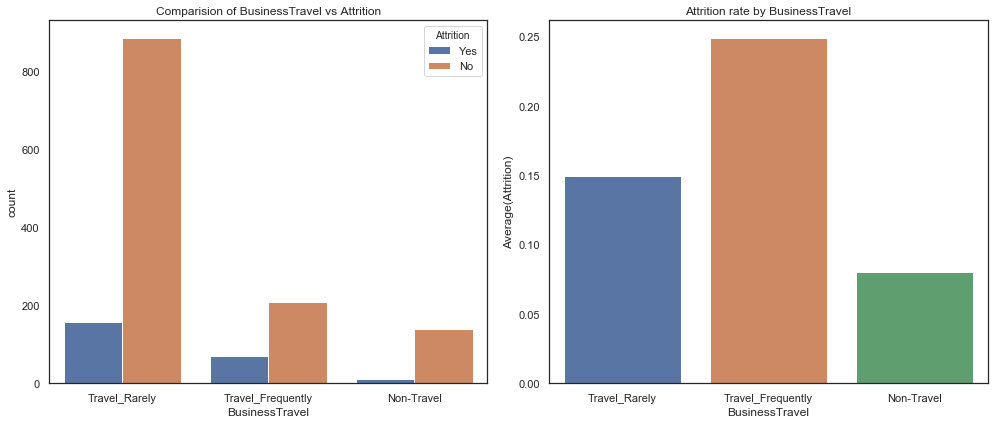

In [41]:

CategoricalVariables_targetPlots(hr,segment_by="BusinessTravel")

In [42]:
hr.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

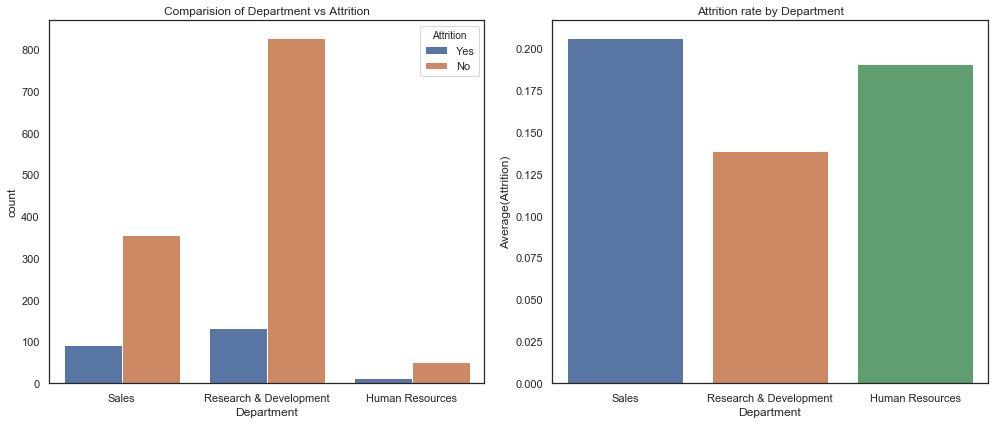

In [43]:
CategoricalVariables_targetPlots(hr,segment_by="Department")

In [44]:
hr.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

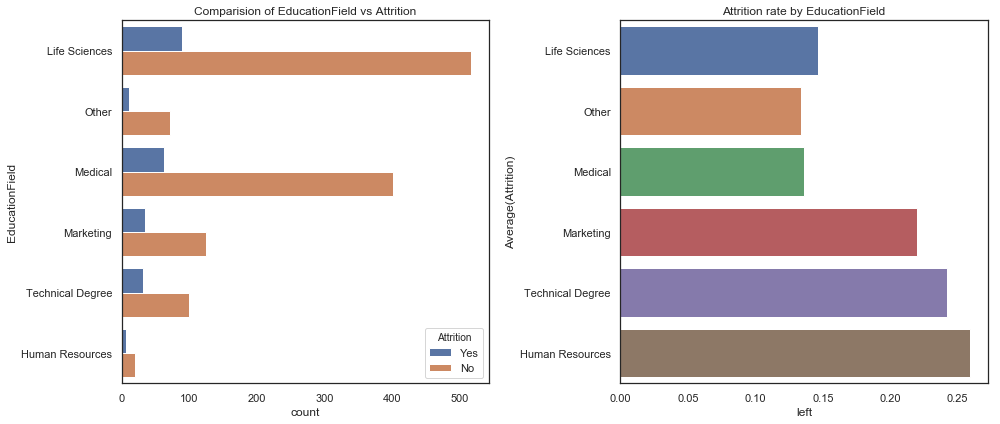

In [45]:
CategoricalVariables_targetPlots(hr,"EducationField",invert_axis=True)

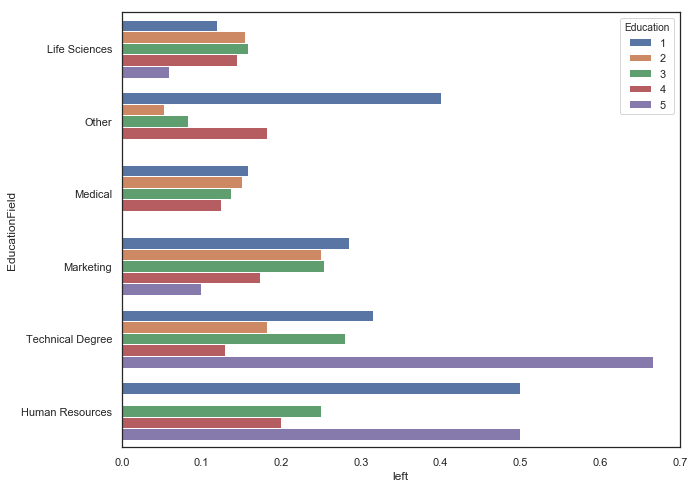

In [46]:
plt.figure(figsize=(10,8))
sns.barplot(y = "EducationField", x = "left", hue="Education", data=hr,ci=None)
plt.show()

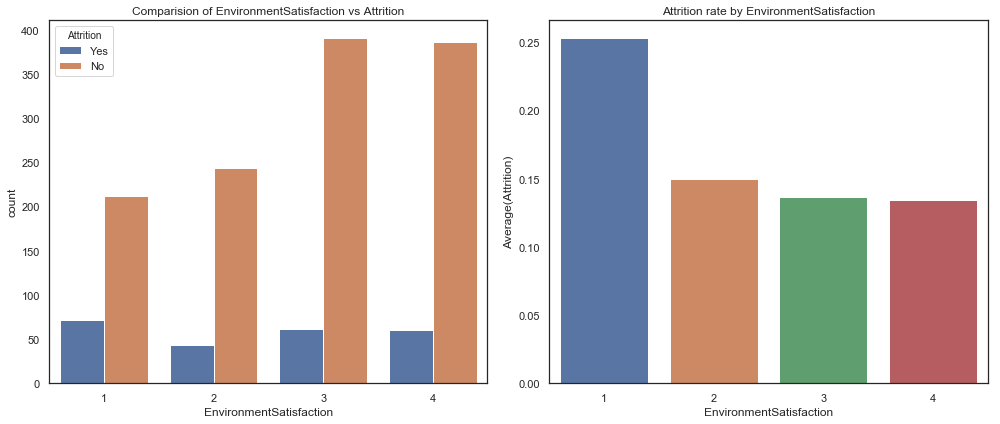

In [47]:
CategoricalVariables_targetPlots(hr,"EnvironmentSatisfaction")

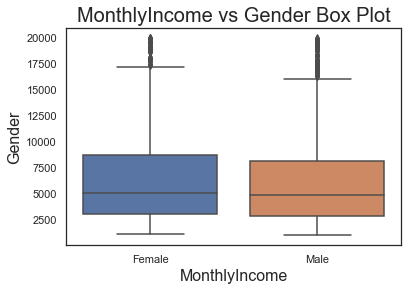

In [48]:
sns.boxplot(hr['Gender'], hr['MonthlyIncome'])
plt.title('MonthlyIncome vs Gender Box Plot', fontsize=20)      
plt.xlabel('MonthlyIncome', fontsize=16)
plt.ylabel('Gender', fontsize=16)
plt.show()

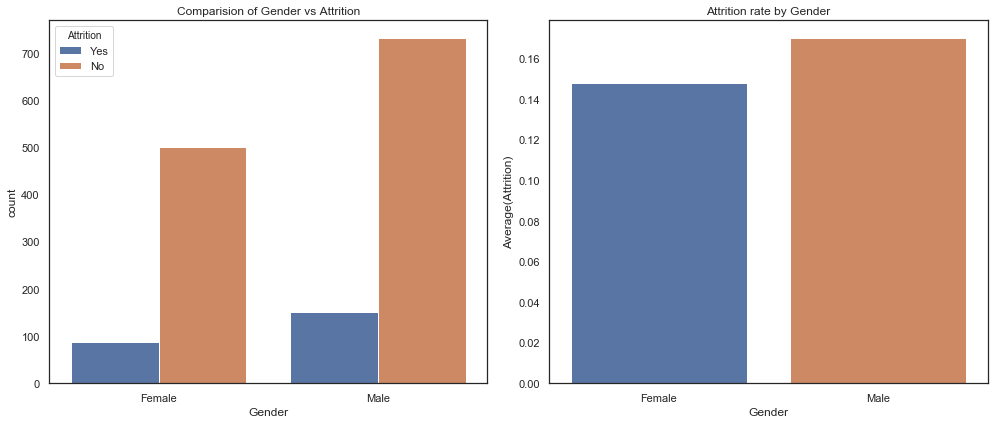

In [49]:
CategoricalVariables_targetPlots(hr,"Gender")

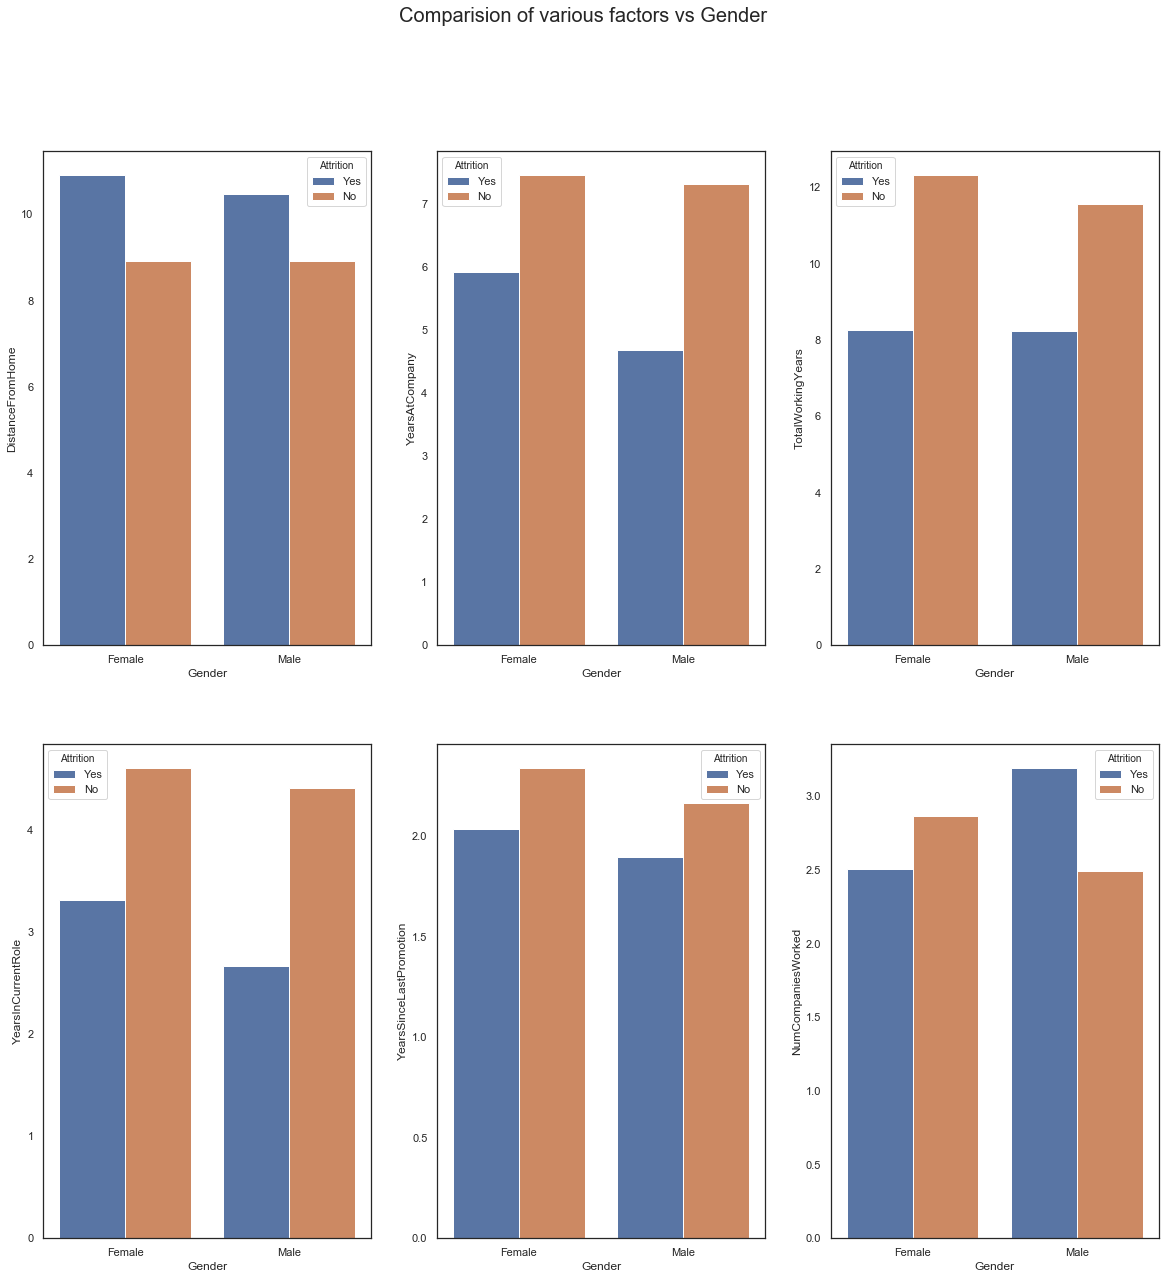

In [50]:
fig,ax = plt.subplots(2,3, figsize=(20,20))               # 'ax' has references to all the four axes
plt.suptitle("Comparision of various factors vs Gender", fontsize=20)
sns.barplot(hr['Gender'],hr['DistanceFromHome'],hue = hr['Attrition'], ax = ax[0,0],ci=None); 
sns.barplot(hr['Gender'],hr['YearsAtCompany'],hue = hr['Attrition'], ax = ax[0,1],ci=None); 
sns.barplot(hr['Gender'],hr['TotalWorkingYears'],hue = hr['Attrition'], ax = ax[0,2],ci=None); 
sns.barplot(hr['Gender'],hr['YearsInCurrentRole'],hue = hr['Attrition'], ax = ax[1,0],ci=None); 
sns.barplot(hr['Gender'],hr['YearsSinceLastPromotion'],hue = hr['Attrition'], ax = ax[1,1],ci=None); 
sns.barplot(hr['Gender'],hr['NumCompaniesWorked'],hue = hr['Attrition'], ax = ax[1,2],ci=None); 
plt.show()

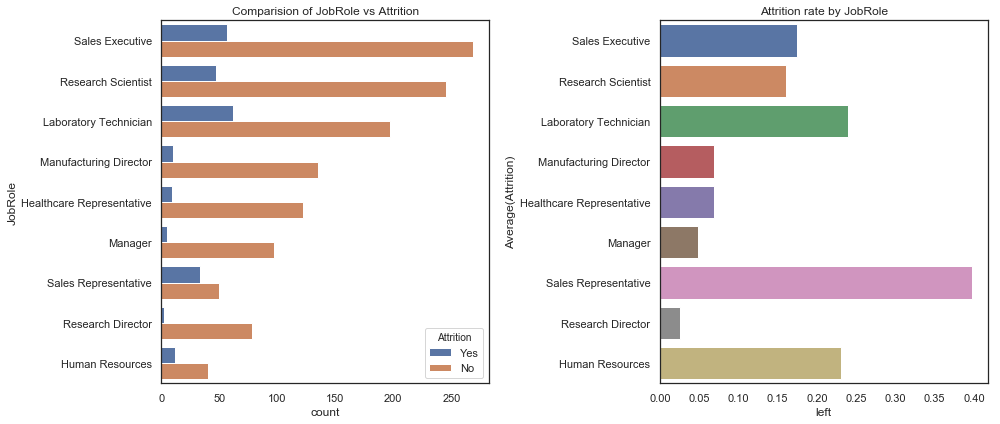

In [51]:
CategoricalVariables_targetPlots(hr,"JobRole",invert_axis=True)

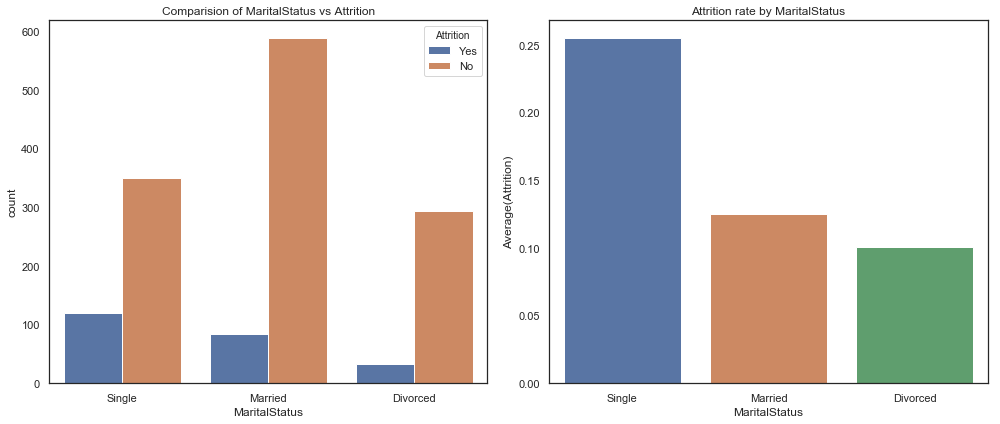

In [52]:
CategoricalVariables_targetPlots(hr,"MaritalStatus")

# Building Decision Tree

In [53]:
from sklearn.model_selection import train_test_split

#for fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#to create a confusion matrix
from sklearn.metrics import confusion_matrix

#import whole class of metrics
from sklearn import metrics

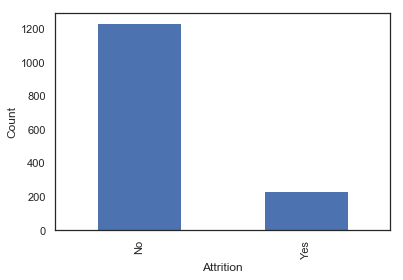

In [55]:
hr.Attrition.value_counts().plot(kind = "bar")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

In [56]:
hr["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [57]:
#copying the main employee data to another dataframe
hr_new = hr.copy()

In [58]:
#dropping the not significant variables
hr_new.drop(["EmployeeCount","EmployeeNumber","Gender","HourlyRate","Over18","StandardHours","left"], axis=1,inplace=True)

# Handling Categorical Variables

In [61]:
#data types of variables
dict(hr_new.dtypes)

{'Age': dtype('int64'),
 'Attrition': dtype('O'),
 'BusinessTravel': dtype('O'),
 'DailyRate': dtype('int64'),
 'Department': dtype('O'),
 'DistanceFromHome': dtype('int64'),
 'Education': dtype('int64'),
 'EducationField': dtype('O'),
 'EnvironmentSatisfaction': dtype('int64'),
 'JobInvolvement': dtype('int64'),
 'JobLevel': dtype('int64'),
 'JobRole': dtype('O'),
 'JobSatisfaction': dtype('int64'),
 'MaritalStatus': dtype('O'),
 'MonthlyIncome': dtype('int64'),
 'MonthlyRate': dtype('int64'),
 'NumCompaniesWorked': dtype('int64'),
 'OverTime': dtype('O'),
 'PercentSalaryHike': dtype('int64'),
 'PerformanceRating': dtype('int64'),
 'RelationshipSatisfaction': dtype('int64'),
 'StockOptionLevel': dtype('int64'),
 'TotalWorkingYears': dtype('int64'),
 'TrainingTimesLastYear': dtype('int64'),
 'WorkLifeBalance': dtype('int64'),
 'YearsAtCompany': dtype('int64'),
 'YearsInCurrentRole': dtype('int64'),
 'YearsSinceLastPromotion': dtype('int64'),
 'YearsWithCurrManager': dtype('int64')}

In [62]:
#segregating the variables based on datatypes

numeric_variable_names  = [key for key in dict(hr_new.dtypes) if dict(hr_new.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

categorical_variable_names = [key for key in dict(hr_new.dtypes) if dict(hr_new.dtypes)[key] in ["object"]]

In [63]:
categorical_variable_names

['Department',
 'MaritalStatus',
 'BusinessTravel',
 'EducationField',
 'JobRole',
 'OverTime',
 'Attrition']

In [64]:
#store the numerical variables data in seperate dataset

hr_num = hr_new[numeric_variable_names]

In [65]:
#store the categorical variables data in seperate dataset

hr_cat = hr_new[categorical_variable_names]
#dropping the attrition 
hr.drop(["Attrition"],axis=1,inplace=True)

In [66]:
#converting into dummy variables

hr_cat = pd.get_dummies(hr_cat)

In [67]:
#Merging the both numerical and categorical data

hr_final = pd.concat([hr_num, hr_cat,hr_new[["Attrition"]]],axis=1)

In [68]:
hr_final.head()

,PercentSalaryHike,RelationshipSatisfaction,YearsSinceLastPromotion,EnvironmentSatisfaction,MonthlyRate,JobLevel,TotalWorkingYears,JobInvolvement,PerformanceRating,StockOptionLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes,Attrition
0,11,1,0,2,19479,2,8,3,3,0,...,0,0,0,1,0,0,1,0,1,Yes
1,23,4,1,3,24907,2,10,2,4,1,...,0,0,1,0,0,1,0,1,0,No
2,15,2,0,4,2396,1,7,2,3,0,...,0,0,0,0,0,0,1,0,1,Yes
3,11,3,3,4,23159,1,8,3,3,0,...,0,0,1,0,0,0,1,1,0,No
4,12,4,2,1,16632,1,6,3,3,1,...,0,0,0,0,0,1,0,1,0,No


In [69]:
#final features
features =  list(hr_final.columns.difference(["Attrition"]))

In [70]:
features

['Age',
 'Attrition_No',
 'Attrition_Yes',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'DailyRate',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'DistanceFromHome',
 'Education',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'JobSatisfaction',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime_No',
 'OverTime_Yes',
 'Percen

# Separating the Target and the Predictors

In [72]:
#separating the target and predictors

X = hr_final[features]
y = hr_final[["Attrition"]]

In [73]:

X.shape

(1470, 50)

# Train-Test Split(Stratified Sampling of Y)

In [74]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

#function for crossvalidate score
from sklearn.model_selection import cross_validate

#to find the best 
from sklearn.model_selection import GridSearchCV

In [75]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 100)

In [76]:
#Checks
#Proportion in training data
y_train.Attrition.value_counts()/len(y_train)

No     0.838678
Yes    0.161322
Name: Attrition, dtype: float64

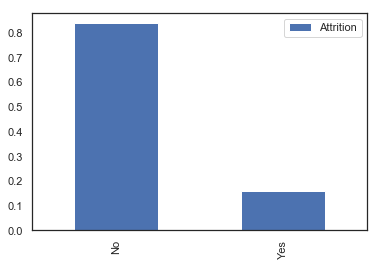

In [77]:
#Checks
#Proportion in training data
pd.DataFrame(y_train.Attrition.value_counts()/len(y_train)).plot(kind = "bar")
plt.show()

In [78]:
#Proportion of test data
y_test.Attrition.value_counts()/len(y_test)

No     0.839002
Yes    0.160998
Name: Attrition, dtype: float64

In [79]:
#make a pipeline for decision tree model 

pipelines = {
    "clf": make_pipeline(DecisionTreeClassifier(max_depth=3,random_state=100))
}


In [80]:
scores = cross_validate(pipelines['clf'], X_train, y_train,return_train_score=True)

In [82]:
scores['test_score'].mean()

1.0

In [83]:
decisiontree_hyperparameters = {
    "decisiontreeclassifier__max_depth": np.arange(3,12),
    "decisiontreeclassifier__max_features": np.arange(3,10),
    "decisiontreeclassifier__min_samples_split": [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "decisiontreeclassifier__min_samples_leaf" : np.arange(1,3)
}

In [84]:
pipelines['clf']

Pipeline(memory=None,
     steps=[('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'))])

# Decision Tree classifier with gini index

In [93]:
#Create a cross validation object from decision tree classifier and it's hyperparameters

clf_model = GridSearchCV(pipelines['clf'], decisiontree_hyperparameters, cv=5, n_jobs=-1)

In [94]:
#fit the model with train data
clf_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'decisiontreeclassifier__min_samples_leaf': array([1, 2]), 'decisiontreeclassifier__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'decisiontreeclassifier__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]), 'decisiontreeclassifier__max_features': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [95]:
#Display the best parameters for Decision Tree Model
clf_model.best_params_

{'decisiontreeclassifier__max_depth': 3,
 'decisiontreeclassifier__max_features': 6,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2}

In [96]:
#Display the best score for the fitted model
clf_model.best_score_

1.0

In [97]:
#In Pipeline we can use the string names to get the decisiontreeclassifer

clf_model.best_estimator_.named_steps['decisiontreeclassifier']

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [101]:
#saving into a variable to get graph

clf_best_model = clf_model.best_estimator_.named_steps['decisiontreeclassifier']

# Model Performance Evaluation

In [103]:
#Making a dataframe of actual and predicted data from test set

tree_test_pred = pd.concat([y_test.reset_index(drop = True),pd.DataFrame(clf_model.predict(X_test))],axis=1)
tree_test_pred.columns = ["actual","predicted"]

#setting the index to original index
tree_test_pred.index = y_test.index

In [100]:

tree_test_pred.head()

,actual,predicted
34,Yes,Yes
1432,No,No
334,No,No
1068,Yes,Yes
736,No,No


In [104]:
#keeping only positive condition (yes for attrition)

pred_probability = pd.DataFrame(p[1] for p in clf_model.predict_proba(X_test))
pred_probability.columns = ["predicted_prob"]
pred_probability.index = y_test.index

In [105]:
#merging the predicted data and its probability value

tree_test_pred = pd.concat([tree_test_pred,pred_probability],axis=1)

In [106]:
tree_test_pred.head()

,actual,predicted,predicted_prob
34,Yes,Yes,1.0
1432,No,No,0.0
334,No,No,0.0
1068,Yes,Yes,1.0
736,No,No,0.0


In [107]:
#converting the labels Yes --> 1 and No --> 0 for further operations below

tree_test_pred["actual_left"] = np.where(tree_test_pred["actual"] == "Yes",1,0)
tree_test_pred["predicted_left"] = np.where(tree_test_pred["predicted"] == "Yes",1,0)

In [108]:

tree_test_pred.head()

,actual,predicted,predicted_prob,actual_left,predicted_left
34,Yes,Yes,1.0,1,1
1432,No,No,0.0,0,0
334,No,No,0.0,0,0
1068,Yes,Yes,1.0,1,1
736,No,No,0.0,0,0


# Confusion Matrix

In [109]:
#confusion matrix
metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted,labels=["Yes","No"])

array([[ 71,   0],
       [  0, 370]], dtype=int64)

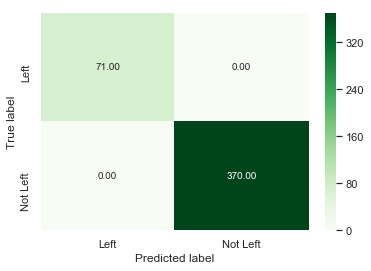

In [110]:
#confusion matrix visualization using seaborn heatmap

sns.heatmap(metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted,
                                    labels=["Yes","No"]),cmap="Greens",annot=True,fmt=".2f",
           xticklabels = ["Left", "Not Left"] , yticklabels = ["Left", "Not Left"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [111]:
#Area Under ROC Curve

auc_score_test = metrics.roc_auc_score(tree_test_pred.actual_left,tree_test_pred.predicted_left)
print("AUROC Score:",round(auc_score_test,4))

('AUROC Score:', 1.0)


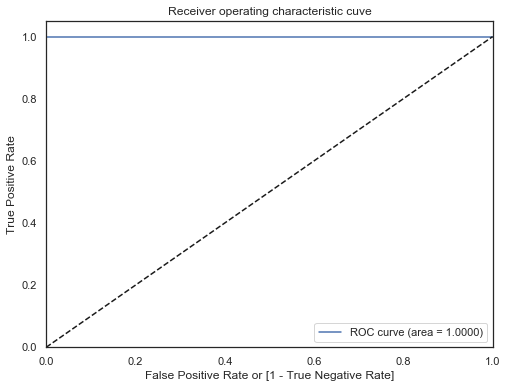

In [112]:
##Plotting the ROC Curve

fpr, tpr, thresholds = metrics.roc_curve(tree_test_pred.actual_left, tree_test_pred.predicted_prob,drop_intermediate=False)


plt.figure(figsize=(8, 6))
plt.plot( fpr, tpr, label='ROC curve (area = %0.4f)' % auc_score_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic cuve')
plt.legend(loc="lower right")
plt.show()

In [113]:
#calculating the recall score

print("Recall Score:",round(metrics.recall_score(tree_test_pred.actual_left,tree_test_pred.predicted_left) * 100,3))

('Recall Score:', 100.0)


In [114]:
#calculating the precision score

print("Precision Score:",round(metrics.precision_score(tree_test_pred.actual_left,tree_test_pred.predicted_left) * 100,3))

('Precision Score:', 100.0)


In [115]:
print(metrics.classification_report(tree_test_pred.actual_left,tree_test_pred.predicted_left))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       370
           1       1.00      1.00      1.00        71

   micro avg       1.00      1.00      1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441

